In [6]:
import numpy as np
import pandas as pd
#from preprocess1121 import preproc, get_X, g_testX, get_y
import torch
from torch.autograd import Variable
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
origin = pd.read_csv("./data/Origin.csv")

In [8]:
origin = origin.dropna(subset=['OLIG_PROTE_CD'])

In [16]:

origin_df = origin.dropna(subset=['TOT_CHOLE','TRIGLYCERIDE','HDL_CHOLE','LDL_CHOLE']) #콜레스트롤
origin_df = origin_df.dropna(subset=['BLDS'])
origin_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414980 entries, 574465 to 999999
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   HCHK_YEAR          414980 non-null  int64  
 1   IDV_ID             414980 non-null  int64  
 2   SIDO               414980 non-null  int64  
 3   SEX                414980 non-null  int64  
 4   AGE_GROUP          414980 non-null  int64  
 5   HEIGHT             414980 non-null  int64  
 6   WEIGHT             414980 non-null  int64  
 7   WAIST              414948 non-null  float64
 8   SIGHT_LEFT         414901 non-null  float64
 9   SIGHT_RIGHT        414904 non-null  float64
 10  HEAR_LEFT          414901 non-null  float64
 11  HEAR_RIGHT         414902 non-null  float64
 12  BP_HIGH            414974 non-null  float64
 13  BP_LWST            414973 non-null  float64
 14  BLDS               414980 non-null  float64
 15  TOT_CHOLE          414980 non-null  float64
 16  TR

In [17]:
origin_df = origin_df.sample(frac=1) 

In [5]:
#비율...분배
origin_1 = origin_df.loc[origin['OLIG_PROTE_CD'] == 1.0]
origin_2 = origin_df.loc[origin['OLIG_PROTE_CD'] == 2.0]
origin_3 = origin_df.loc[origin['OLIG_PROTE_CD'] == 3.0]
origin_4 = origin_df.loc[origin['OLIG_PROTE_CD'] == 4.0]
origin_5 = origin_df.loc[origin['OLIG_PROTE_CD'] == 5.0]
origin_6 = origin_df.loc[origin['OLIG_PROTE_CD'] == 6.0]

In [18]:
print(origin_df.OLIG_PROTE_CD.value_counts())
#train_OL.OLIG_PROTE_CD.value_counts()
#origin_2.OLIG_PROTE_CD.value_counts().sum()

OLIG_PROTE_CD
1.0    383218
2.0     17357
3.0      9817
4.0      3269
5.0      1047
6.0       272
Name: count, dtype: int64


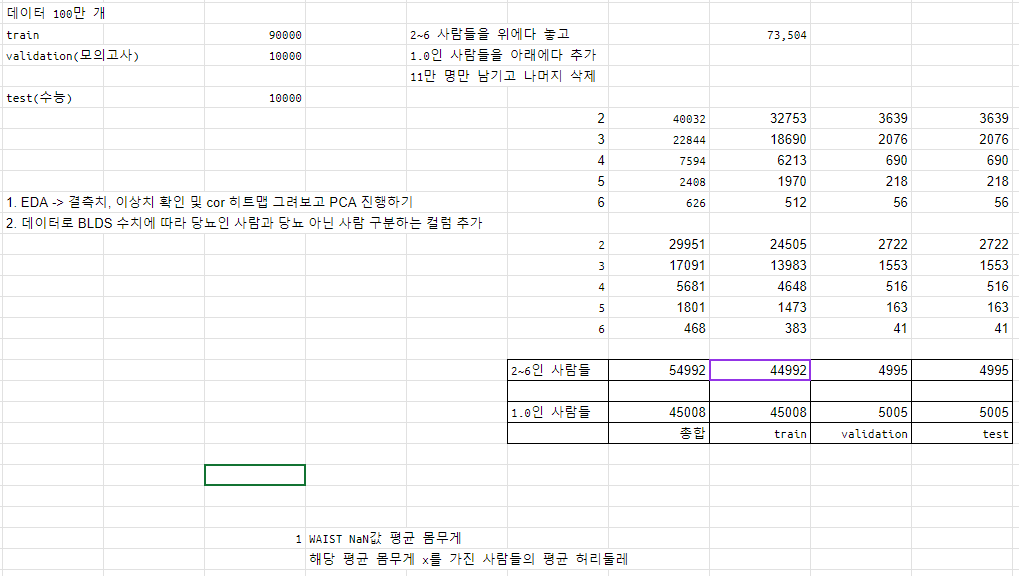

In [7]:
""" 
train = pd.concat([origin_1.head(45008), origin_2.head(24505), origin_3.head(13983), origin_4.head(4648), origin_5.head(1473), origin_6.head(383)])
validation = pd.concat([origin_1.head(5005), origin_2.head(2722), origin_3.head(1553), origin_4.head(516), origin_5.head(163), origin_6.head(41)])
test = pd.concat([origin_1.head(5005), origin_2.head(2722), origin_3.head(1553), origin_4.head(516), origin_5.head(163), origin_6.head(41)])
 """

In [19]:
origin_df.BLDS.isnull().sum()

0

In [21]:
origin_df['D'] = origin_df['BLDS'].apply(lambda x : 1 if x >= 126 else 0)

In [22]:
# train.to_csv('./data/train.csv')
# validation.to_csv('./data/validation.csv')
# test.to_csv('./data/test.csv')

origin_df.to_csv('./data/origin_df.csv')